In [10]:
unionbudget =pd.read_csv("C:\\Users\\Nyla Majid\\Downloads\\union budget.csv", encoding='latin1')

In [11]:
unionbudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Serial no    722 non-null    int64  
 1   Category     722 non-null    object 
 2   Ministry     722 non-null    object 
 3   Scheme       722 non-null    object 
 4   A_21_Rev     722 non-null    float64
 5   A_21_Cap     722 non-null    float64
 6   A_21_Tot     722 non-null    float64
 7   BE_22_Rev    626 non-null    float64
 8   BE_22_Cap    721 non-null    float64
 9   BE_22_Tot    721 non-null    float64
 10  RE_22_Rev    722 non-null    float64
 11  RE_22_Rev.1  722 non-null    float64
 12  RE22_ Tot    722 non-null    float64
 13  BE_23_Rev    722 non-null    float64
 14  BE_23_Cap    722 non-null    float64
 15  BE_23_Tot    722 non-null    float64
dtypes: float64(12), int64(1), object(3)
memory usage: 90.4+ KB


In [12]:
print(unionbudget.columns.tolist())

['Serial no', 'Category', 'Ministry', 'Scheme', 'A_21_Rev', 'A_21_Cap', 'A_21_Tot', 'BE_22_Rev', 'BE_22_Cap', 'BE_22_Tot', 'RE_22_Rev', 'RE_22_Rev.1', 'RE22_ Tot', 'BE_23_Rev', 'BE_23_Cap', 'BE_23_Tot']


In [13]:
unionbudget.dtypes

Serial no        int64
Category        object
Ministry        object
Scheme          object
A_21_Rev       float64
A_21_Cap       float64
A_21_Tot       float64
BE_22_Rev      float64
BE_22_Cap      float64
BE_22_Tot      float64
RE_22_Rev      float64
RE_22_Rev.1    float64
RE22_ Tot      float64
BE_23_Rev      float64
BE_23_Cap      float64
BE_23_Tot      float64
dtype: object

In [19]:
unionbudget.head(2)


,Serial no,Category,Ministry,Scheme,A_21_Rev\n,A_21_Cap,A_21_Tot,BE_22_Rev,BE_22_Cap,BE_22_Tot,RE_22_Rev,RE_22_Rev.1,RE22_ Tot,BE_23_Rev,BE_23_Cap,BE_23_Tot
0,1,Demand No. 1,Department of Agriculture and Farmers Welfare,Crop Insurance Scheme,13549.24,0.0,13549.24,15500.0,0.0,15500.0,12375.76,0.0,12375.76,13625.0,0.0,13625.0
1,2,Demand No. 1,Department of Agriculture and Farmers Welfare,Interest Subsidy for Short Term Credit to Farmers,21476.93,0.0,21476.93,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0


In [14]:
unionbudget.rename(columns={ 'A_21_Tot': 'Actuals_2021','BE_22_Tot': 'BE_2022','BE_23_Tot': 'BE_2023','Ministry': 'Ministry','Scheme': 'Scheme'}, inplace=True)

In [21]:
unionbudget.head(2)

,Serial no,Category,Ministry,Scheme,A_21_Rev\n,A_21_Cap,Actuals_2021,BE_22_Rev,BE_22_Cap,BE_2022,RE_22_Rev,RE_22_Rev.1,RE22_ Tot,BE_23_Rev,BE_23_Cap,BE_2023
0,1,Demand No. 1,Department of Agriculture and Farmers Welfare,Crop Insurance Scheme,13549.24,0.0,13549.24,15500.0,0.0,15500.0,12375.76,0.0,12375.76,13625.0,0.0,13625.0
1,2,Demand No. 1,Department of Agriculture and Farmers Welfare,Interest Subsidy for Short Term Credit to Farmers,21476.93,0.0,21476.93,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0


In [15]:
#Select Relevant Columns
budget = unionbudget[['Category', 'Ministry', 'Scheme','Actuals_2021', 'BE_2022', 'BE_2023']].copy()
budget

,Category,Ministry,Scheme,Actuals_2021,BE_2022,BE_2023
0,Demand No. 1,Department of Agriculture and Farmers Welfare,Crop Insurance Scheme,13549.24,15500.0,13625.00
1,Demand No. 1,Department of Agriculture and Farmers Welfare,Interest Subsidy for Short Term Credit to Farmers,21476.93,0.0,0.00
2,Demand No. 1,Department of Agriculture and Farmers Welfare,Modified Interest Subvention Scheme (MISS),0.00,19500.0,23000.00
3,Demand No. 1,Department of Agriculture and Farmers Welfare,Market Intervention Scheme and Price Support S...,2288.33,1500.0,0.01
4,Demand No. 1,Department of Agriculture and Farmers Welfare,Pradhan Mantri Annadata Aay Sanrakshan Yojna (...,0.00,1.0,0.01
...,...,...,...,...,...,...
717,Demand No. 102,Ministry of Youth Affairs and Sports,Scheme of Human Resource Development in Sports,0.00,0.0,3.00
718,Demand No. 102,Ministry of Youth Affairs and Sports,National Centre of Sports Science & Research,0.00,0.0,13.00
719,Demand No. 102,Ministry of Youth Affairs and Sports,Khelo India,764.28,974.0,1000.00
720,Demand No. 102,Ministry of Youth Affairs and Sports,Enhancement of Sports Facility at J& K,15.00,50.0,15.00


In [19]:
#Calculate Growth %
budget['Growth_percent'] = ((budget['BE_2023'] - budget['BE_2022']) / budget['BE_2022']) * 100
budget

,Category,Ministry,Scheme,Actuals_2021,BE_2022,BE_2023,Growth_%,Growth_percent
0,Demand No. 1,Department of Agriculture and Farmers Welfare,Crop Insurance Scheme,13549.24,15500.0,13625.00,-12.096774,-12.096774
1,Demand No. 1,Department of Agriculture and Farmers Welfare,Interest Subsidy for Short Term Credit to Farmers,21476.93,0.0,0.00,NaN,NaN
2,Demand No. 1,Department of Agriculture and Farmers Welfare,Modified Interest Subvention Scheme (MISS),0.00,19500.0,23000.00,17.948718,17.948718
3,Demand No. 1,Department of Agriculture and Farmers Welfare,Market Intervention Scheme and Price Support S...,2288.33,1500.0,0.01,-99.999333,-99.999333
4,Demand No. 1,Department of Agriculture and Farmers Welfare,Pradhan Mantri Annadata Aay Sanrakshan Yojna (...,0.00,1.0,0.01,-99.000000,-99.000000
...,...,...,...,...,...,...,...,...
717,Demand No. 102,Ministry of Youth Affairs and Sports,Scheme of Human Resource Development in Sports,0.00,0.0,3.00,inf,inf
718,Demand No. 102,Ministry of Youth Affairs and Sports,National Centre of Sports Science & Research,0.00,0.0,13.00,inf,inf
719,Demand No. 102,Ministry of Youth Affairs and Sports,Khelo India,764.28,974.0,1000.00,2.669405,2.669405
720,Demand No. 102,Ministry of Youth Affairs and Sports,Enhancement of Sports Facility at J& K,15.00,50.0,15.00,-70.000000,-70.000000


In [21]:
ministry_budget = budget.groupby('Ministry')[['Actuals_2021', 'BE_2022', 'BE_2023']].sum().reset_index()
ministry_budget

,Ministry,Actuals_2021,BE_2022,BE_2023
0,Atomic Energy,4650.97,7435.82,6963.19
1,Capital Outlay on Defence Services,137986.97,152369.61,162600.00
2,Department for Promotion of Industry and Inter...,7718.74,7690.39,7372.03
3,Department of Agricultural Research and Education,2327.71,1995.83,2423.41
4,Department of Agriculture and Farmers Welfare,105368.88,105710.00,98980.03
...,...,...,...,...
64,Ministry of Textiles,10995.91,12016.92,3603.78
65,Ministry of Tourism,686.84,2270.34,2286.22
66,Ministry of Tribal Affairs,1421.16,2945.53,6618.49
67,Ministry of Youth Affairs and Sports,1257.99,1832.50,1913.51


In [22]:
ministry_budget['Growth_percent'] = ((ministry_budget['BE_2023'] - ministry_budget['BE_2022']) / ministry_budget['BE_2022']) * 100
ministry_budget.sort_values('BE_2023',ascending=False).head(10)

,Ministry,Actuals_2021,BE_2022,BE_2023,Growth_percent
60,Ministry of Road Transport and Highways,123419.90,198944.48,270250.38,35.842110
59,Ministry of Railways,117270.54,137100.00,240000.00,75.054705
14,Department of Food and Public Distribution,301729.45,207291.10,197868.57,-4.545555
12,Department of Fertilisers,153758.10,105222.32,175103.37,66.412763
1,Capital Outlay on Defence Services,137986.97,152369.61,162600.00,6.714193
4,Department of Agriculture and Farmers Welfare,105368.88,105710.00,98980.03,-6.366446
55,Ministry of Petroleum and Natural Gas,5491.33,8737.82,40785.60,366.770888
30,Indirect Taxes,0.00,0.00,27554.59,inf
47,Ministry of Housing and Urban Affairs,28767.45,27501.02,26444.96,-3.840076
50,"Ministry of Micro, Small and Medium Enterprises",15107.14,21357.85,21852.55,2.316244


In [11]:
unionbudget.Ministry.nunique()

69

In [13]:
unionbudget.Scheme.nunique()

710

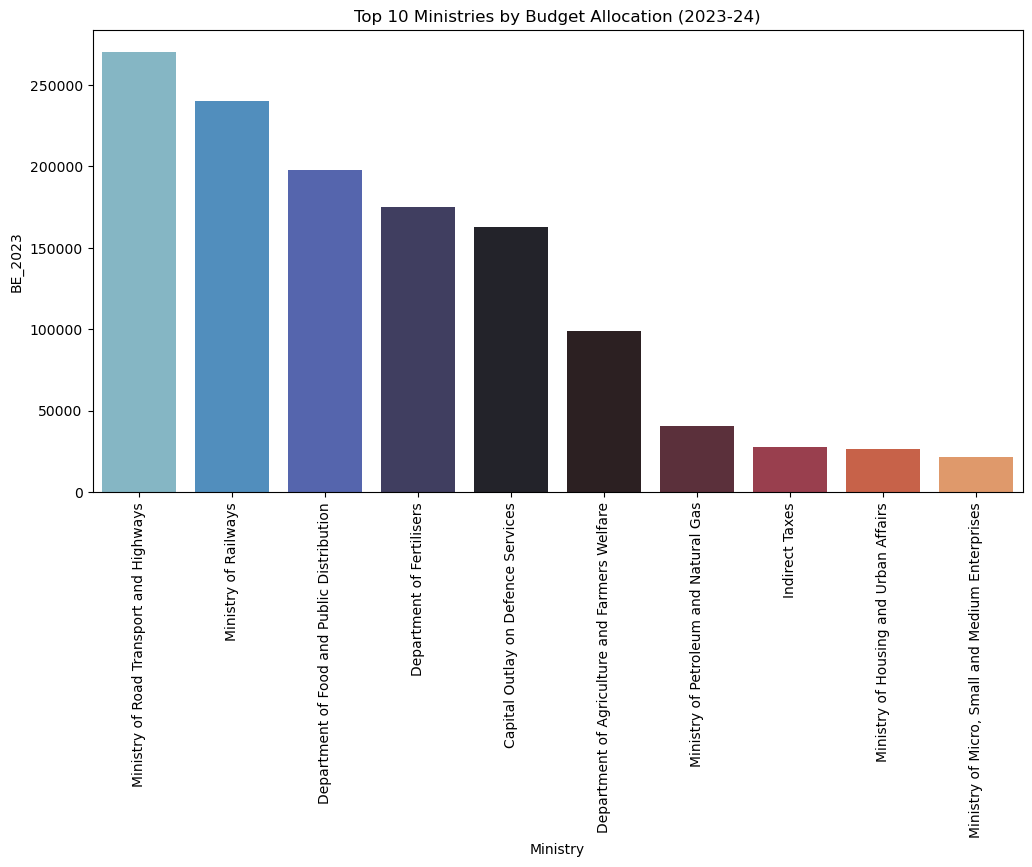

In [96]:
#Visualize Top 10 Ministries
top10= ministry_budget.sort_values('BE_2023',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Ministry', y='BE_2023',palette='icefire',hue ='Ministry',legend=False)
plt.xticks(rotation=90)
plt.title('Top 10 Ministries by Budget Allocation (2023-24)')
plt.show()

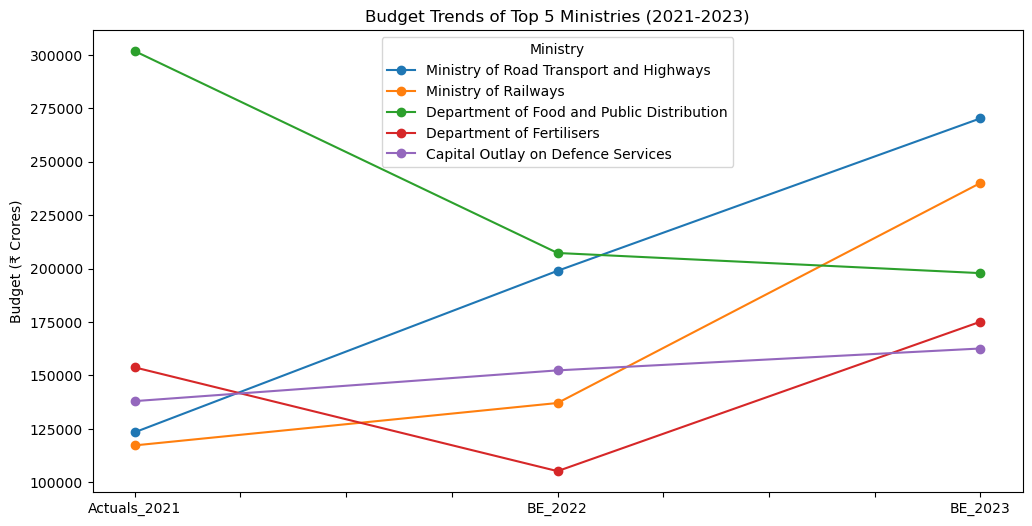

In [23]:
top5 = ministry_budget.sort_values('BE_2023', ascending=False).head(5)

top5.set_index('Ministry')[['Actuals_2021', 'BE_2022', 'BE_2023']].T.plot(figsize=(12,6), marker='o')
plt.title("Budget Trends of Top 5 Ministries (2021-2023)")
plt.ylabel("Budget (₹ Crores)")
plt.show()

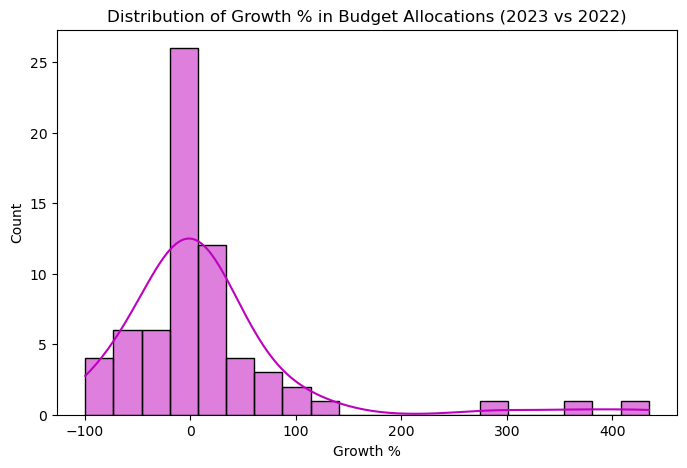

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(ministry_budget['Growth_percent'], bins=20, kde=True, color="m")
plt.title("Distribution of Growth % in Budget Allocations (2023 vs 2022)")
plt.xlabel("Growth %")
plt.show()

In [68]:
unionbudget.Category.nunique()

69

In [26]:
sector_budget =budget.groupby('Category')[['Actuals_2021', 'BE_2022', 'BE_2023']].sum().reset_index()
sector_budget

,Category,Actuals_2021,BE_2022,BE_2023
0,Demand No. 1,105368.88,105710.00,98980.03
1,Demand No. 10,6632.05,5209.40,4351.47
2,Demand No. 100,1421.16,2945.53,6618.49
3,Demand No. 102,1257.99,1832.50,1913.51
4,Demand No. 11,7718.74,7690.39,7372.03
...,...,...,...,...
64,Demand No. 95,10612.58,12642.00,11669.41
65,Demand No. 96,1973.83,4527.11,4558.50
66,Demand No. 97,6.13,4.49,24.00
67,Demand No. 98,10995.91,12016.92,3603.78


In [27]:
sector_budget['Growth_percent'] = ((sector_budget['BE_2023'] -sector_budget['BE_2022']) / sector_budget['BE_2022']) * 100
sector_budget.sort_values('BE_2023',ascending=False).head(10)

,Category,Actuals_2021,BE_2022,BE_2023,Growth_percent
54,Demand No. 86,123419.90,198944.48,270250.38,35.842110
53,Demand No. 85,117270.54,137100.00,240000.00,75.054705
8,Demand No. 15,301729.45,207291.10,197868.57,-4.545555
36,Demand No. 6,153758.10,105222.32,175103.37,66.412763
14,Demand No. 21,137986.97,152369.61,162600.00,6.714193
0,Demand No. 1,105368.88,105710.00,98980.03,-6.366446
48,Demand No. 76,5491.33,8737.82,40785.60,366.770888
26,Demand No. 37,0.00,0.00,27554.59,inf
37,Demand No. 60,28767.45,27501.02,26444.96,-3.840076
42,Demand No. 68,15107.14,21357.85,21852.55,2.316244


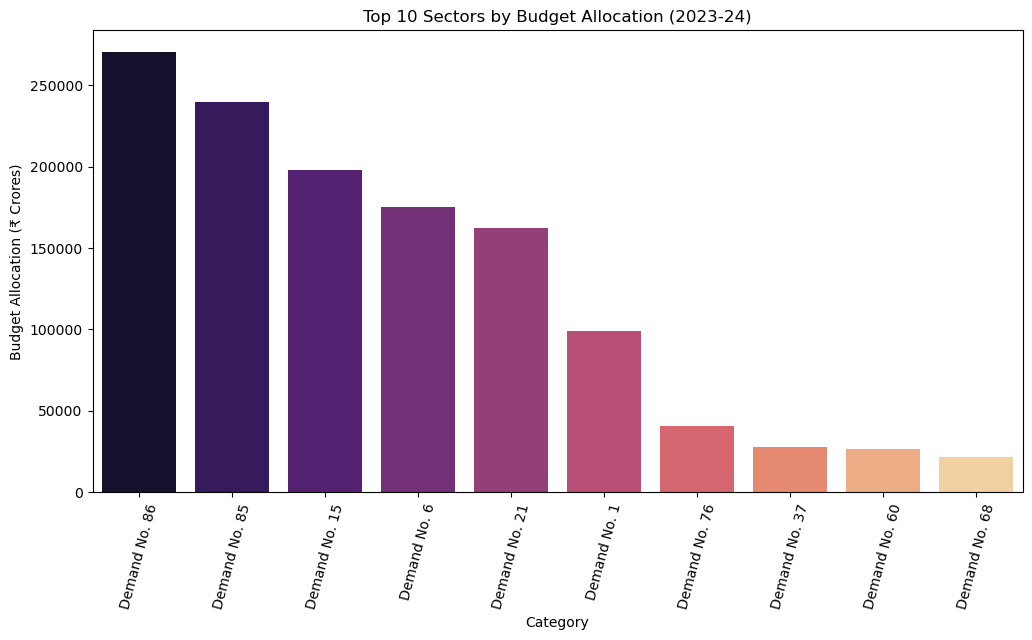

In [93]:

T10=sector_budget.sort_values('BE_2023',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=T10, x='Category', y='BE_2023', palette='magma',hue ='Category',legend=False)
plt.xticks(rotation=75)
plt.ylabel("Budget Allocation (₹ Crores)")
plt.title("Top 10 Sectors by Budget Allocation (2023-24)")
plt.show()

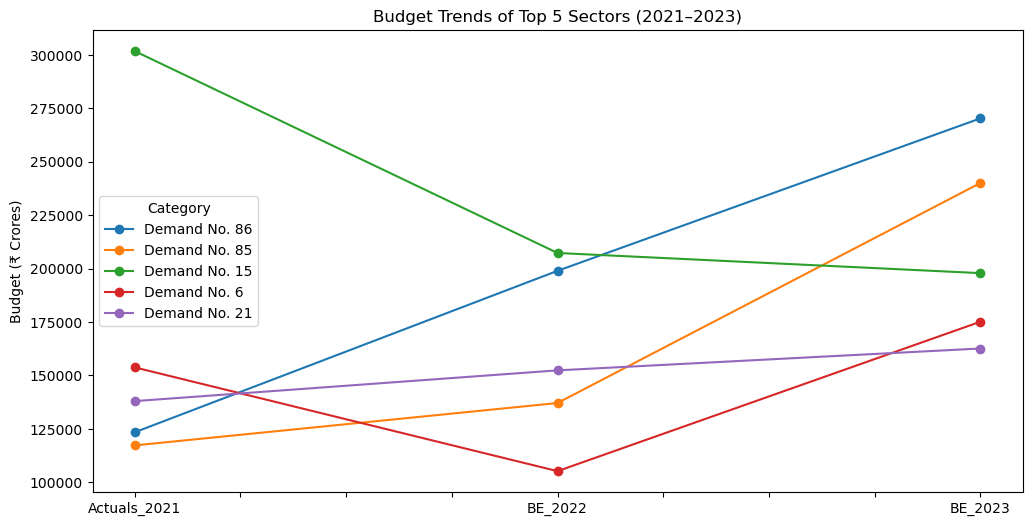

In [28]:
top5_sectors = sector_budget.sort_values('BE_2023', ascending=False).head(5)

top5_sectors.set_index('Category')[['Actuals_2021', 'BE_2022', 'BE_2023']].T.plot(figsize=(12,6), marker='o')
plt.title("Budget Trends of Top 5 Sectors (2021–2023)")
plt.ylabel("Budget (₹ Crores)")
plt.show()

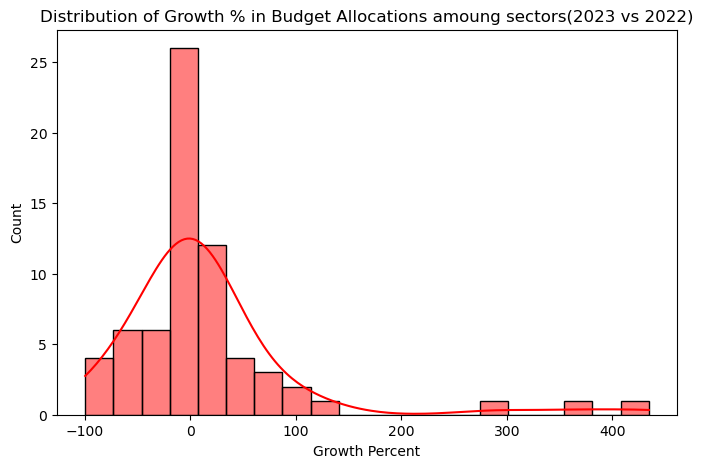

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(sector_budget['Growth_percent'], bins=20, kde=True, color="red")
plt.title("Distribution of Growth % in Budget Allocations amoung sectors(2023 vs 2022)")
plt.xlabel("Growth Percent")
plt.show()

In [32]:
#SCHEMEWISE ANALYSIS
scheme_budget =budget.groupby('Scheme')[['Actuals_2021', 'BE_2022', 'BE_2023']].sum().reset_index()
scheme_budget

,Scheme,Actuals_2021,BE_2022,BE_2023
0,5G Connectivity Test Bed,10.21,10.0,5.56
1,ASEAN Fellowship,1.03,10.0,3.00
2,"ASPIRE (Promotion of Innovation, Rural Industr...",8.64,20.0,22.23
3,AYURGYAN,4.49,15.5,9.00
4,AYUSH Oushadhi Gunvatta evum Uttapadan Samvard...,1.77,23.5,20.00
...,...,...,...,...
705,Yarn Supply Scheme,89.53,0.0,0.00
706,Youth Hostel,1.99,7.5,0.00
707,e-Courts Phase II,98.29,0.0,0.00
708,e-Courts Phase III,0.00,1.0,0.01


In [33]:
scheme_budget['Growth_percent'] = ((scheme_budget['BE_2023'] -scheme_budget['BE_2022']) / scheme_budget['BE_2022']) * 100
top10_schemes=scheme_budget.sort_values('BE_2023',ascending=False).head(10)
top10_schemes

,Scheme,Actuals_2021,BE_2022,BE_2023,Growth_percent
383,National Highways Authority of India,57080.64,134015.00,162207.00,21.036451
191,Food Subsidy to Food Corporation of India und...,208929.00,145919.90,137207.00,-5.971016
692,Urea Subsidy,100988.13,63222.32,131100.12,107.363665
574,Road Works,66236.98,64567.86,107713.38,66.821976
490,Pradhan Mantri Kisan Samman Nidhi (PM-Kisan),66825.11,68000.00,60000.00,-11.764706
192,Food Subsidy for Decentralized Procurement of ...,79789.54,60561.19,59793.00,-1.268453
329,Manufacturing Suspense,37550.34,47065.22,55855.18,18.676126
685,Transfer to Railway Safety Fund,10600.00,0.00,45000.00,inf
435,Nutrient Based Subsidy,52769.97,42000.00,44000.00,4.761905
575,Rolling Stock,13541.27,8077.84,37744.00,367.253622


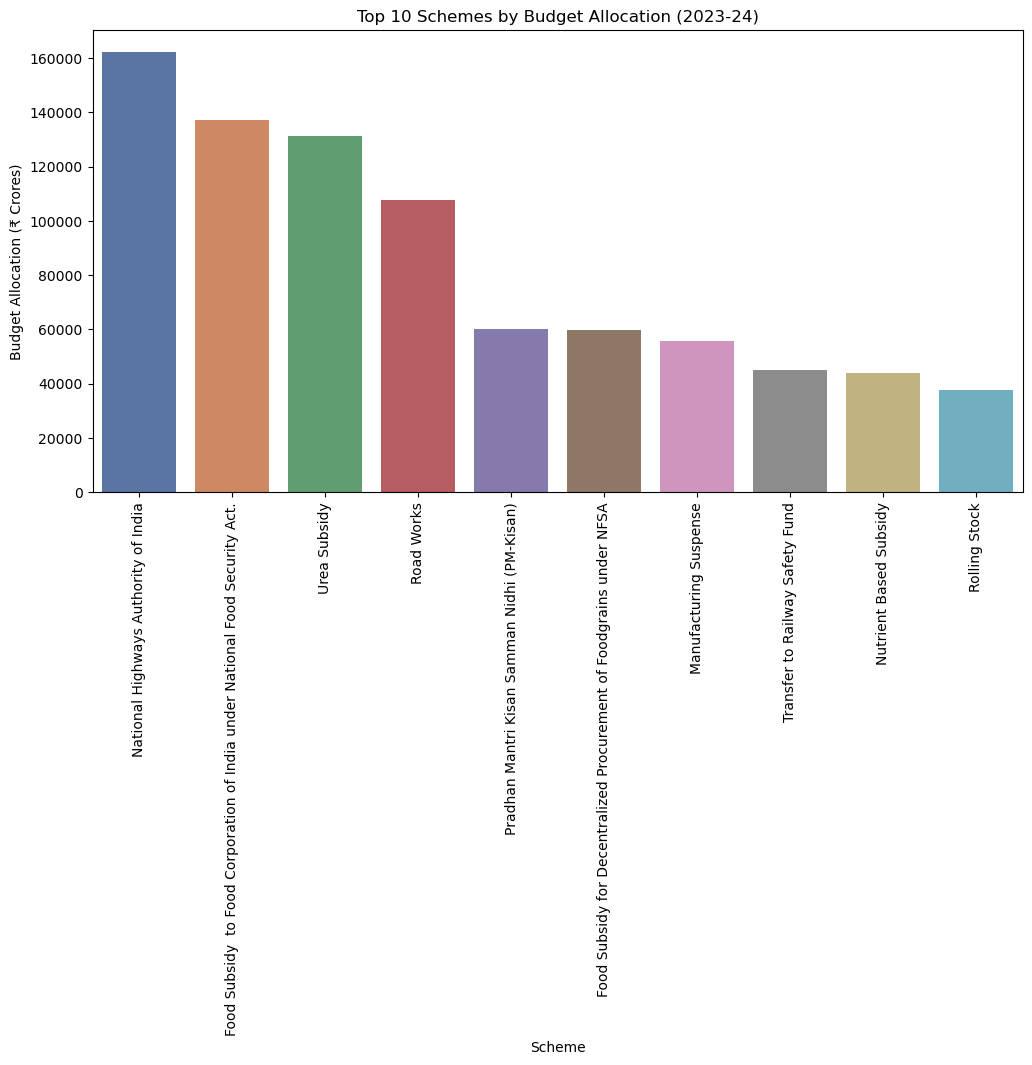

In [34]:

plt.figure(figsize=(12,6))
sns.barplot(data=top10_schemes, x='Scheme', y='BE_2023', palette='deep',hue ='Scheme',legend=False)
plt.xticks(rotation=90)
plt.ylabel("Budget Allocation (₹ Crores)")
plt.title("Top 10 Schemes by Budget Allocation (2023-24)")
plt.show()

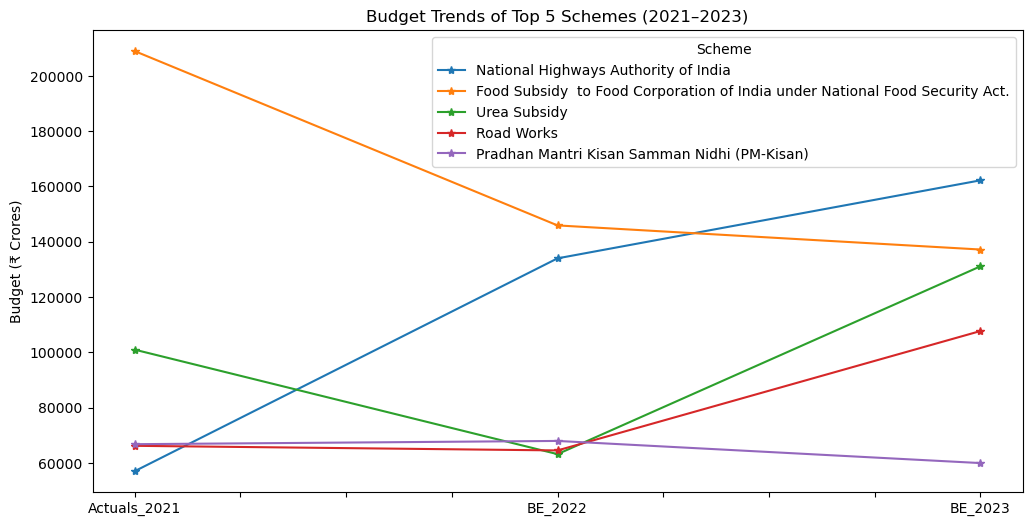

In [35]:
top5_schemes = scheme_budget.sort_values('BE_2023', ascending=False).head(5)

top5_schemes.set_index('Scheme')[['Actuals_2021', 'BE_2022', 'BE_2023']].T.plot(figsize=(12,6), marker='*')
plt.title("Budget Trends of Top 5 Schemes (2021–2023)")
plt.ylabel("Budget (₹ Crores)")
plt.show()

In [37]:
budget.to_csv('C:\\Users\\Nyla Majid\\OneDrive\\Documents\\Datasets\\Unionbudget_cleaned.csv',index = False)